In [1]:
#import packages
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from bs4 import BeautifulSoup


from datetime import datetime, timedelta
from bsi_sentiment.twitter import search_tweets_sn

In [2]:
with open("nasdaq100.html", encoding='utf8') as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")

In [3]:
#print(soup.prettify())

In [4]:
#soup.find_all("td", attrs = {"data-x":"4"})

In [5]:
company_listings = []
for idx in range(len(soup.find_all("td", attrs = {"data-x":"4"}))):
    if soup.find_all("td", attrs = {"data-x":"4"})[idx]['data-order'] == "X":
        company_listings.append(soup.find_all("td", attrs = {"data-x":"0"})[idx]['data-order'])
print(company_listings)

['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'ALXN', 'AMAT', 'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BMRN', 'CDNS', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'TCOM', 'CTSH', 'CTXS', 'DLTR', 'EA', 'EBAY', 'EXPE', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA', 'GILD', 'GOOG', 'GOOGL', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR', 'MCHP', 'MDLZ', 'MNST', 'MSFT', 'MU', 'MXIM', 'NFLX', 'NTAP', 'NTES', 'NVDA', 'NXPI', 'ORLY', 'PAYX', 'PCAR', 'BKNG', 'PYPL', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SIRI', 'SNPS', 'SWKS', 'TMUS', 'TSLA', 'TXN', 'ULTA', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'WDC', 'XLNX', 'MELI', 'WDAY', 'TTWO', 'ASML', 'ALGN', 'PEP', 'AMD', 'LULU', 'UAL', 'WLTW', 'XEL', 'EXC', 'SPLK', 'CSGP', 'ANSS', 'CPRT', 'CDW', 'SGEN']


In [6]:
#get a company's ticker using a key
quandl.ApiConfig.api_key = 'LjVzy1VC64LF83o8h-Ko'

#Get list of tickers
ticker = pd.read_csv('ticker_list.csv')

In [7]:
#I suspect NASDAQ stocks wil be, on average, more sensitive to Twitter sentiment than "traditional" companies on NYSE, SP500, etc
nasdaq = ticker[ticker["Exchange"] == "NASDAQ"].reset_index(drop = True)
nasdaq100 = nasdaq[nasdaq['Ticker'].isin(company_listings)].reset_index(drop = True)

In [8]:
# list of all NASDAQ 100 stocks (EOY 2016) in Quandl's NASDAQ database
# list(nasdaq100['Ticker'])

# list of companies in NASDAQ 100 (EOY 2016) not in Quandl's NASDAQ database
# set(list(nasdaq100['Ticker'])) ^ set(company_listings)


In [9]:
#graphs of all NASDAQ 100 companies
#for code in nasdaq100["Quandl_Code"]:
#    company = quandl.get(code, start_date='2016-12-31', end_date='2020-12-31')
#    plt.plot(company["Open"])
#    plt.title(nasdaq100[nasdaq100["Quandl_Code"] == code].reset_index(drop = True)["Name"][0])
#    plt.show()

In [10]:
ListOfTwitterHandles = pd.read_csv('Data/TwitterHandles.csv')
ListOfTwitterHandles.Symbol.to_list()

['MRNA', 'PYPL', 'ZM']

In [12]:
Handles = ['MRNA', 'PYPL', 'ZM']
Tweetlist_BSI_df = pd.DataFrame()

for i, HandleList in enumerate(Handles):
    TweetList_df = pd.DataFrame([])
    for Term in [x.replace(" ","") for x in ListOfTwitterHandles.TwitterHandle[i].split('or')]:        
        print(Term)
        tweets = search_tweets_sn(
        q = str(Term),
        since = "2020-02-19",
        until="2020-04-19",
        lang="en",
        max_tweets=1000000
        )

        TweetList_df = TweetList_df.append(pd.DataFrame(
            [[tweet.date, tweet.text, tweet.username, ListOfTwitterHandles.Company[i], ListOfTwitterHandles.Symbol[i], Term] for tweet in tweets], 
            columns= ['Created','Text','User', 'Company', 'Symbol', 'TwitterTerm']
            ))


    TweetList_df.to_csv("Data/CompanyTweets/" + str(Term[1:]) + "_tweets.csv", index=False)

@moderna_tx


Moderna


$MRNA


@PayPal


PayPal


$PYPL


@zoom_us


$ZM


In [13]:
#covid_terms = ["coronavirus", "COVID", "pandemic"]

#covid_df = pd.DataFrame([])

#for term in covid_terms:
#    print(term)
#    tweets = search_tweets_sn(
#    q = str(term),
#    since = "2020-02-19",
#    until="2020-04-19",
#    lang="en",
#    max_tweets=100000
#    )
    
#    covid_df = covid_df.append(pd.DataFrame(
#            [[tweet.date, tweet.text, tweet.username, term] for tweet in tweets], 
#            columns= ['Created','Text','User', 'Covid Term']
#            ))
    
#covid_df.to_csv("Data/covid_tweets.csv", index=False)

In [19]:
moderna_tweets = pd.read_csv('Data/CompanyTweets/MRNA_tweets.csv')
paypal_tweets = pd.read_csv('Data/CompanyTweets/PYPL_tweets.csv')
zoom_tweets = pd.read_csv('Data/CompanyTweets/ZM_tweets.csv')

In [15]:
print(f"Number of Tweets: {len(zoom_tweets):,} between {min(zoom_tweets.Created)} and {max(zoom_tweets.Created)}")

Number of Tweets: 73,527 between 2020-02-19 and 2020-04-18


In [16]:
moderna_tweets = pd.read_csv('Data/CompanyTweets/MRNA_tweets.csv')

MRNA_TweetsPerDay = moderna_tweets.pivot_table(index='Created', values='Text', aggfunc='count')
MRNA_TweetsPerDay.reset_index(inplace=True)
MRNA_TweetsPerDay.sort_values(by='Text', ascending=False)

idx = pd.date_range("2020-2-19","2020-4-18")
MRNA_TweetsPerDay.index = pd.DatetimeIndex(MRNA_TweetsPerDay.Created)
MRNA_TweetsPerDay = MRNA_TweetsPerDay.reindex(idx, fill_value=0)

del MRNA_TweetsPerDay['Created']

In [17]:
paypal_tweets = pd.read_csv('Data/CompanyTweets/PYPL_tweets.csv')

PYPL_TweetsPerDay = paypal_tweets.pivot_table(index='Created', values='Text', aggfunc='count')
PYPL_TweetsPerDay.reset_index(inplace=True)
PYPL_TweetsPerDay.sort_values(by='Text', ascending=False)

idx = pd.date_range("2020-2-19","2020-4-18")
PYPL_TweetsPerDay.index = pd.DatetimeIndex(PYPL_TweetsPerDay.Created)
PYPL_TweetsPerDay = PYPL_TweetsPerDay.reindex(idx, fill_value=0)

del PYPL_TweetsPerDay['Created']

In [18]:
zoom_tweets = pd.read_csv('Data/CompanyTweets/PYPL_tweets.csv')

ZM_TweetsPerDay = zoom_tweets.pivot_table(index='Created', values='Text', aggfunc='count')
ZM_TweetsPerDay.reset_index(inplace=True)
ZM_TweetsPerDay.sort_values(by='Text', ascending=False)

idx = pd.date_range("2020-2-19","2020-4-18")
ZM_TweetsPerDay.index = pd.DatetimeIndex(ZM_TweetsPerDay.Created)
ZM_TweetsPerDay = ZM_TweetsPerDay.reindex(idx, fill_value=0)

del ZM_TweetsPerDay['Created']

In [20]:
# stock price (Feb 19 2020 - April 18 2020)
MRNA_stock = quandl.get("EOD/MRNA", start_date='2020-2-19', end_date='2020-4-18')
PYPL_stock = quandl.get("EOD/PYPL", start_date='2020-2-19', end_date='2020-4-18')
ZM_stock = quandl.get("EOD/ZM", start_date='2020-2-19', end_date='2020-4-18')

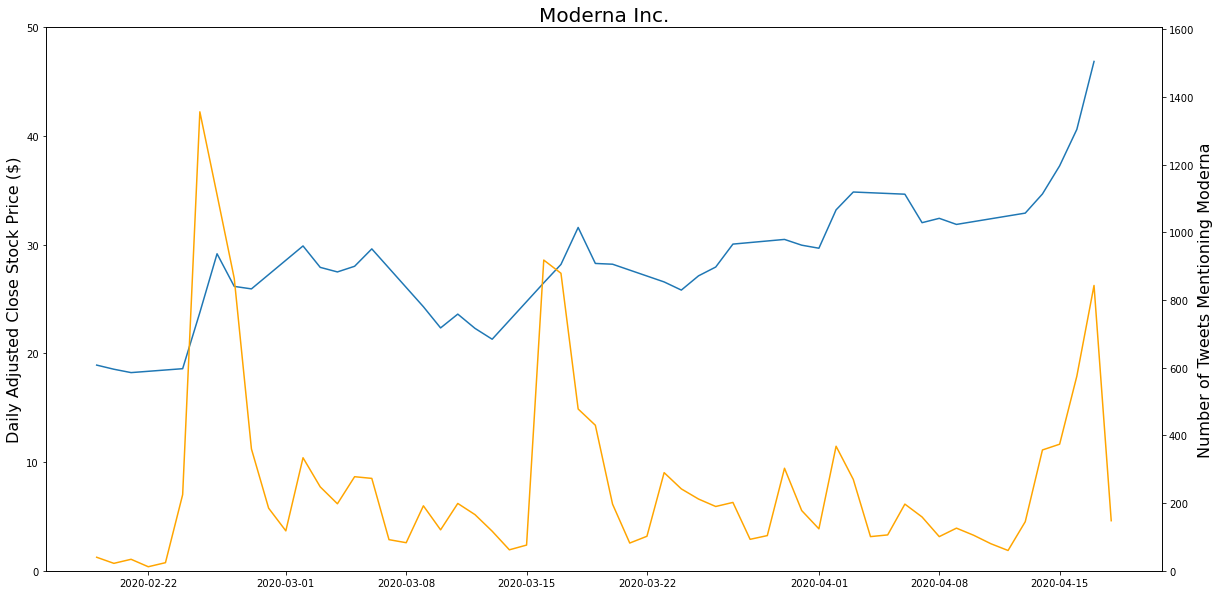

In [34]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ax1.plot(MRNA_stock['Adj_Close'])
ax2 = ax1.twinx()
ax2.plot(MRNA_TweetsPerDay, color='orange')
ax1.set_title(nasdaq[nasdaq["Quandl_Code"] == "EOD/MRNA"].reset_index(drop = True)["Name"][0], size=20)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Mentioning Moderna", size=16)
ax1.set_ylim(0,50)
ax2.set_ylim(0,max(MRNA_TweetsPerDay['Text'].astype(int))+250)
plt.show()

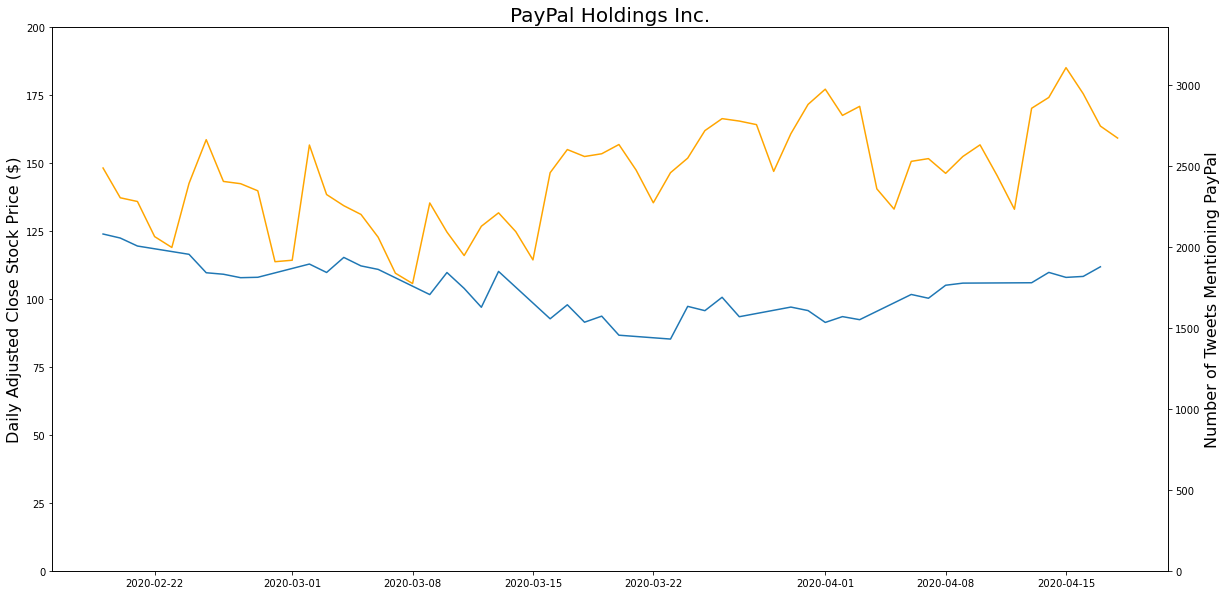

In [33]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ax1.plot(PYPL_stock['Adj_Close'])
ax2 = ax1.twinx()
ax2.plot(PYPL_TweetsPerDay, color='orange')
ax1.set_title(nasdaq[nasdaq["Quandl_Code"] == "EOD/PYPL"].reset_index(drop = True)["Name"][0], size=20)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Mentioning PayPal", size=16)
ax1.set_ylim(0,200)
ax2.set_ylim(0,max(PYPL_TweetsPerDay['Text'].astype(int))+250)
plt.show()

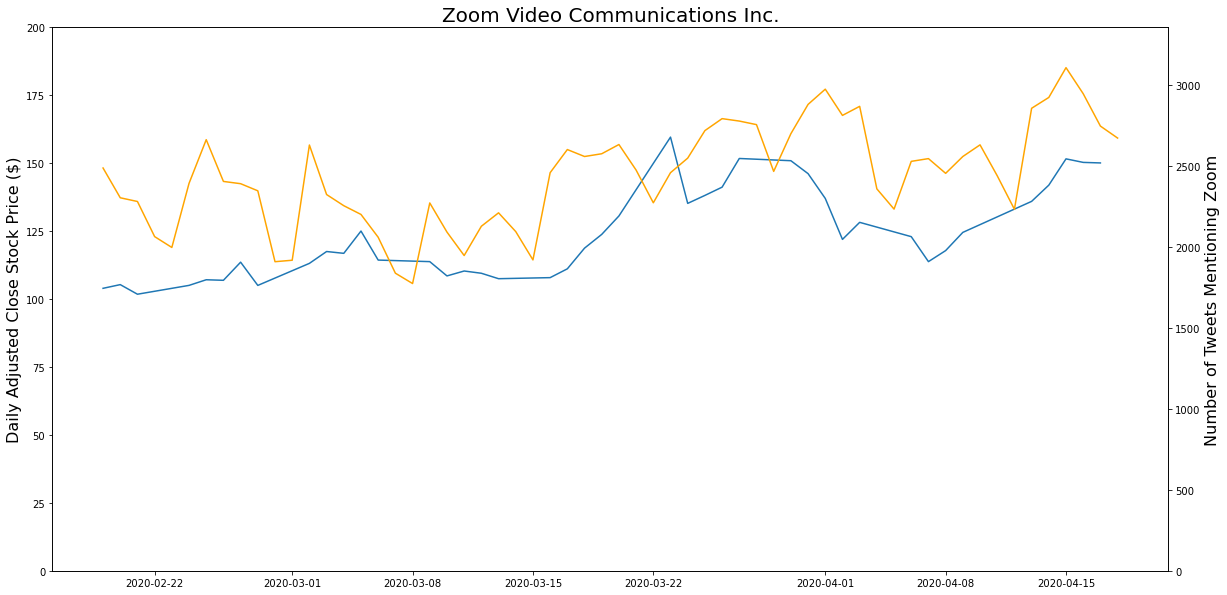

In [32]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ax1.plot(ZM_stock['Adj_Close'])
ax2 = ax1.twinx()
ax2.plot(ZM_TweetsPerDay, color='orange')
ax1.set_title(nasdaq[nasdaq["Quandl_Code"] == "EOD/ZM"].reset_index(drop = True)["Name"][0], size=20)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Mentioning Zoom", size=16)
ax1.set_ylim(0,200)
ax2.set_ylim(0,max(ZM_TweetsPerDay['Text'].astype(int))+250)
plt.show()